<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Project-list" data-toc-modified-id="Project-list-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Project list</a></span></li><li><span><a href="#Project-metadata" data-toc-modified-id="Project-metadata-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Project metadata</a></span></li><li><span><a href="#Collecting-all-MAGs" data-toc-modified-id="Collecting-all-MAGs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Collecting all MAGs</a></span><ul class="toc-item"><li><span><a href="#Checkm-info-for-dRep" data-toc-modified-id="Checkm-info-for-dRep-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Checkm info for dRep</a></span></li><li><span><a href="#Quality-MAGs-per-sample" data-toc-modified-id="Quality-MAGs-per-sample-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Quality MAGs per sample</a></span><ul class="toc-item"><li><span><a href="#checkM" data-toc-modified-id="checkM-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>checkM</a></span></li></ul></li></ul></li><li><span><a href="#dRep" data-toc-modified-id="dRep-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>dRep</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Adding-info" data-toc-modified-id="Adding-info-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Adding info</a></span><ul class="toc-item"><li><span><a href="#checkM" data-toc-modified-id="checkM-7.1.1.1"><span class="toc-item-num">7.1.1.1&nbsp;&nbsp;</span>checkM</a></span></li><li><span><a href="#gtdbtk" data-toc-modified-id="gtdbtk-7.1.1.2"><span class="toc-item-num">7.1.1.2&nbsp;&nbsp;</span>gtdbtk</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#checkM" data-toc-modified-id="checkM-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>checkM</a></span></li><li><span><a href="#GTDBTk" data-toc-modified-id="GTDBTk-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>GTDBTk</a></span></li></ul></li><li><span><a href="#Summary-by-project" data-toc-modified-id="Summary-by-project-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary by project</a></span><ul class="toc-item"><li><span><a href="#GTDBTk" data-toc-modified-id="GTDBTk-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>GTDBTk</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* dreplicate all MAGs at 99.9 % ANI

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/'
MAG_dir = file.path(work_dir, 'MAGs')
tmp_out_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/'

# project metadata
study_meta_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/metadata/study_metadata_v2.xlsx'

# params
threads = 24
ani = 0.95
conda_env = 'metacompass'


# Init

In [3]:
library(dplyr)
library(tidyr)
library(readxl)
library(ggplot2)
library(data.table)
library(doParallel)

library(future)
library(future.batchtools)
library(future.apply)
options(future.wait.interval = 2.0)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')
dt.dims()

In [4]:
make_dir(MAG_dir)
cat('\n')

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs 



# Project list

In [5]:
projects = dir(tmp_out_dir, 'PR*', full.names = TRUE) %>% sapply(basename) %>% as.vector
projects %>% length %>% print
projects

[1] 13


[1] "PRJEB11755"              "PRJEB20308"             
 [3] "PRJEB22765"              "PRJEB23642"             
 [5] "PRJEB29346"              "PRJEB9357"              
 [7] "PRJNA316560-PRJNA316570" "PRJNA336354"            
 [9] "PRJNA381379"             "PRJNA417359"            
[11] "PRJNA476660"             "PRJNA485217"            
[13] "PRJNA532626"

# Project metadata

In [6]:
study_meta = readxl::read_excel(study_meta_file)
study_meta %>% dfhead

[1] 13  4


ProjectID,Host,Num_samples_used,Publication_DOI
PRJEB11755,Pig,100,DOI: 10.1038/nmicrobiol.2016.161
PRJEB20308,Dog,100,DOI: 10.1186/s40168-018-0450-3
PRJEB22765,Macaque,20,DOI: 10.1093/gigascience/giy100


In [7]:
# checking overlap
intersect(projects, study_meta$ProjectID) %>% length

[1] 13

# Collecting all MAGs

* combining all MAGs in 1 directory; renaming as needed
* all MAGs generated

In [8]:
# MAGs selected by DAS-tool 
das_tool_genomes = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    das_tool_dir = file.path(asmbl_dir, 'bin_refine', 'DAS_Tool')
    
    dastool_files = list.files(das_tool_dir, '*.fa$', full.names=TRUE, recursive=TRUE)
    dastool = data.frame(binID = gsub('\\.fa$', '', basename(dastool_files)),
                    fasta = dastool_files)
    dastool$projectID = projectID
    return(dastool)
}

# loading all post das-tool files
dastool = projects %>% as.list %>% lapply(das_tool_genomes, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
dastool %>% dfhead

[1] 8488    3


binID,fasta,projectID
SAMEA3663006__maxbin2_high_prob.014.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_high_prob.014.contigs.fa,PRJEB11755
SAMEA3663006__maxbin2_low_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_low_prob.005.contigs.fa,PRJEB11755
SAMEA3663006__metabat2_high_PE.015.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__metabat2_high_PE.015.contigs.fa,PRJEB11755


In [9]:
# checking for unique naming 
dastool$binID %>% length %>% print
dastool$binID %>% unique %>% length %>% print

[1] 8488
[1] 8488


In [10]:
# copying MAGs
dastool = dastool %>%
    mutate(out_file = gsub('.+/', paste0(MAG_dir, '/'), fasta)) 
dastool %>% dfhead

[1] 8488    4


binID,fasta,projectID,out_file
SAMEA3663006__maxbin2_high_prob.014.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_high_prob.014.contigs.fa,PRJEB11755,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/SAMEA3663006__maxbin2_high_prob.014.contigs.fa
SAMEA3663006__maxbin2_low_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_low_prob.005.contigs.fa,PRJEB11755,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/SAMEA3663006__maxbin2_low_prob.005.contigs.fa
SAMEA3663006__metabat2_high_PE.015.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__metabat2_high_PE.015.contigs.fa,PRJEB11755,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/SAMEA3663006__metabat2_high_PE.015.contigs.fa


In [ ]:
# copying MAGs 
cp_files = function(src, dst){
     file.copy(as.character(src), as.character(dst))
}

res = mapply(cp_files, dastool$fasta, dastool$out_file)

In [11]:
# checking number of fasta files copied
F = list.files(MAG_dir) 
F = F[grepl('.fa$', F)]
F %>% length %>% print

[1] 8488


## Checkm info for dRep

In [12]:
checkm_info = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    checkm_markers_file = file.path(asmbl_dir, 'checkm', 'markers_qa_summary.tsv')
    
    markers_sum = read.delim(checkm_markers_file, sep='\t')

    markers_sum$projectID = projectID
    return(markers_sum)
}

# checkm info
markers_sum = projects %>% as.list %>% lapply(checkm_info, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .) %>%
    inner_join(dastool, c('Bin.Id'='binID', 'projectID'='projectID'))
markers_sum %>% dfhead

[1] 8488   32


Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..ambiguous.bases,⋯,X..predicted.genes,X0,X1,X2,X3,X4,X5.,projectID,fasta,out_file
SAMEA3663136__maxbin2_low_prob.001.contigs,o__Bacteroidales (UID2716),92,487,270,69.20,1.20,36.36,2021688,0,⋯,2269,134,342,11,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.001.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/SAMEA3663136__maxbin2_low_prob.001.contigs.fa
SAMEA3663136__maxbin2_low_prob.002.contigs,c__Clostridia (UID1118),387,223,124,36.76,0.00,0.00,559857,0,⋯,736,136,87,0,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.002.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/SAMEA3663136__maxbin2_low_prob.002.contigs.fa
SAMEA3663136__maxbin2_low_prob.008.contigs,o__Bacteroidales (UID2617),213,406,265,80.57,0.89,60.00,2026627,0,⋯,2016,64,337,5,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.008.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/SAMEA3663136__maxbin2_low_prob.008.contigs.fa


In [13]:
markers_sum$Completeness %>% summary %>% print
markers_sum$Completeness %>% sd %>% print
markers_sum$Contamination %>% summary %>% print
markers_sum$Contamination %>% sd %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.52   70.05   88.75   80.12   96.13  100.00 
[1] 20.94155
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.430   1.100   2.373   2.100 111.520 
[1] 6.289622


In [14]:
n_quality_MAGs = markers_sum %>%
    filter(Completeness >= 50,
           Contamination < 5) %>%
    nrow

cat('Number of quality MAGs:', n_quality_MAGs, '\n')

Number of quality MAGs: 6939 


In [15]:
# writing table of checkm info for dRep
markers_sum_f = markers_sum %>%
    dplyr::select(out_file, Completeness, Contamination) %>%
    mutate(out_file = gsub('\\/+', '\\/', out_file)) %>%
    rename('genome' = out_file,
           'completeness' = Completeness,
           'contamination' = Contamination) %>%
    mutate(completeness = completeness %>% as.character %>% as.numeric,
           completeness = ifelse(is.na(completeness), 0, completeness),
           contamination = contamination %>% as.character %>% as.numeric,
           contamination = ifelse(is.na(contamination), 0, contamination))

checkm_info_F = file.path(MAG_dir, 'checkm_info.tsv')
markers_sum_f %>%
    write.table(file=checkm_info_F, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', checkm_info_F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/checkm_info.tsv 


## Quality MAGs per sample

In [16]:
# summarizing quality MAGs
markers_sum_s = markers_sum %>%
    filter(Completeness >= 50,
           Contamination < 5) %>%
    group_by(projectID) %>%
    summarize(n_MAGs = n()) %>%
    ungroup() %>%
    inner_join(study_meta, c('projectID'='ProjectID')) 

markers_sum_s$n_MAGs %>% summary %>% print
markers_sum_s$n_MAGs %>% sd %>% print

markers_sum_s

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0    29.0   128.0   533.8  1152.0  1885.0 
[1] 646.4931


projectID,n_MAGs,Host,Num_samples_used,Publication_DOI
PRJEB11755,1152,Pig,100,DOI: 10.1038/nmicrobiol.2016.161
PRJEB20308,1885,Dog,100,DOI: 10.1186/s40168-018-0450-3
⋮,⋮,⋮,⋮,⋮
PRJNA485217,128,Capuchin,19,DOI: 10.1038/s41396-018-0256-0
PRJNA532626,548,Black rhinoceros,25,DOI: 10.1038/s41598-019-43875-3


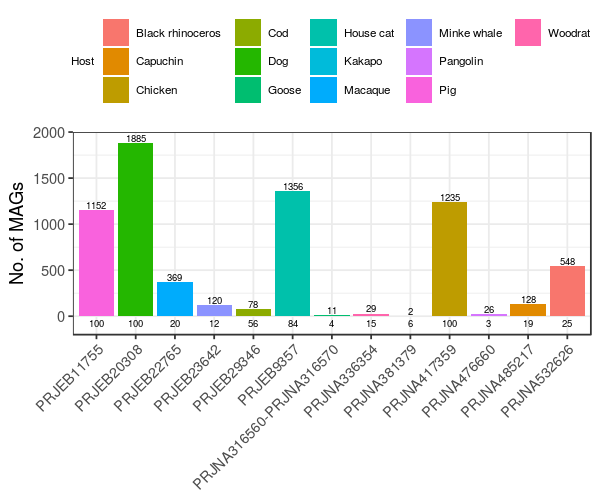

In [17]:
# plotting
p = markers_sum_s %>%
    ggplot(aes(projectID, n_MAGs, fill=Host)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=n_MAGs), 
              size=2, vjust=-0.16) +
    geom_text(aes(y=0, label=Num_samples_used), 
              size=2, vjust=1.5) +
    scale_y_continuous(limits=c(-100, 1900)) +
    labs(x='BioProject', y='No. of MAGs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1),
        axis.title.x = element_blank(),
        legend.position = 'top',
        legend.text=element_text(size=7),
        legend.title=element_text(size=7)
    )

dims(5,4.2,res=120)
plot(p)

### checkM

In [18]:
markers_sum_s = markers_sum %>%
    filter(Completeness >= 50,
           Contamination < 5) 

markers_sum_s$Completeness %>% summary %>% print
markers_sum_s$Completeness %>% sd %>% print
markers_sum_s$Contamination %>% summary %>% print
markers_sum_s$Contamination %>% sd %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.08   78.60   91.39   86.24   96.63  100.00 
[1] 13.18164
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.500   1.080   1.294   1.900   4.990 
[1] 1.070386


In [19]:
markers_sum_s = markers_sum %>%
    filter(Completeness >= 50,
           Contamination < 5) %>%
    dplyr::select(projectID, Completeness, Contamination) %>%
    gather(checkm_metric, checkm_value, -projectID) %>%
    inner_join(study_meta, c('projectID'='ProjectID')) 

markers_sum_s

projectID,checkm_metric,checkm_value,Host,Num_samples_used,Publication_DOI
PRJEB11755,Completeness,69.20,Pig,100,DOI: 10.1038/nmicrobiol.2016.161
PRJEB11755,Completeness,80.57,Pig,100,DOI: 10.1038/nmicrobiol.2016.161
⋮,⋮,⋮,⋮,⋮,⋮
PRJNA532626,Contamination,0.67,Black rhinoceros,25,DOI: 10.1038/s41598-019-43875-3
PRJNA532626,Contamination,1.42,Black rhinoceros,25,DOI: 10.1038/s41598-019-43875-3


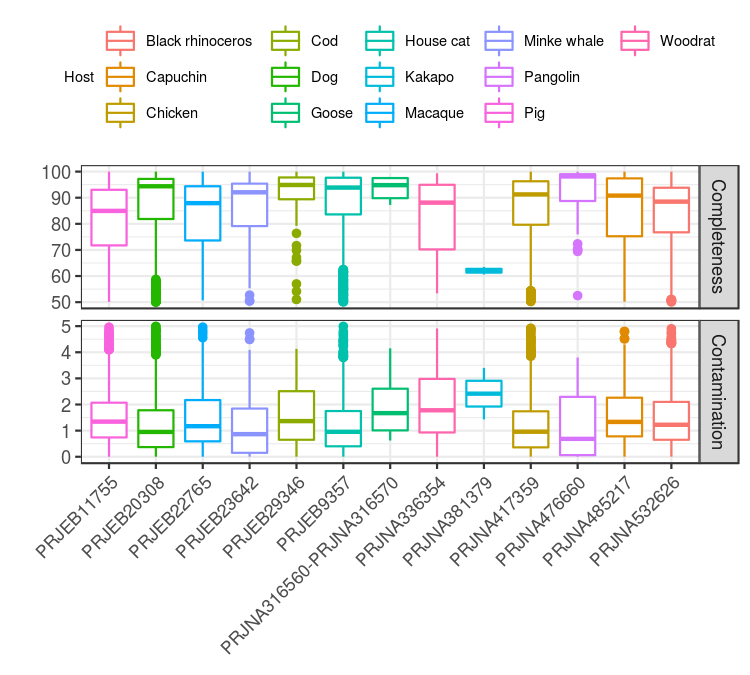

In [20]:
p = markers_sum_s %>%
    ggplot(aes(projectID, checkm_value, color=Host)) +
    geom_boxplot() +
    facet_grid(checkm_metric ~ ., scales='free_y') +
    labs(x='BioProject', y='') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1),
        axis.title.x = element_blank(),
        legend.position = 'top',
        legend.text=element_text(size=7),
        legend.title=element_text(size=7)
    )

dims(5,4.5)
plot(p)

# dRep

In [21]:
# output directory (deletes if exists)
drep_outdir = file.path(MAG_dir, 'drep_95')
unlink(drep_outdir, recursive = TRUE)
make_dir(drep_outdir)

Created directory: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95 


In [22]:
# data_tables directory (for Bdb.csv)
drep_dt_outdir = file.path(drep_outdir, 'data_tables')
make_dir(drep_dt_outdir)

Created directory: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/data_tables 


In [23]:
# creating a file with genome info for dRep
bdb_F = file.path(drep_dt_outdir, 'Bdb.csv')
markers_sum %>%
    mutate(genome = basename(out_file)) %>%
    rename('location' = out_file,
           'length' = Genome.size..bp.) %>%
    dplyr::select(genome, location, length) %>%
    write.table(file=bdb_F, sep=',', quote=FALSE, row.names=FALSE)
cat('File written:', bdb_F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/data_tables/Bdb.csv 


In [24]:
# dRep cmd
cmd = 'dRep dereplicate -comp 50 -con 5 -sa {ani} -p {threads} --genomeInfo {checkm_info} {outdir}'
cmd = glue::glue(cmd, threads=threads, ani=ani, checkm_info=checkm_info_F, outdir=drep_outdir)
cmd

dRep dereplicate -comp 50 -con 5 -sa 0.95 -p 24 --genomeInfo /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/checkm_info.tsv /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95

In [25]:
# local run (relatively short job due to providing checkm info)
bash_job(cmd, conda_env=conda_env)

***************************************************
    ..:: dRep dereplicate Step 1. Filter ::..
***************************************************
    
Will filter Bdb
Calculating genome info of genomes
99.99% of genomes passed length filtering
Provided genome info has full genome path- correcting
81.77% of genomes passed checkM filtering
***************************************************
    ..:: dRep dereplicate Step 2. Cluster ::..
***************************************************
    
Clustering Step 1. Parse Arguments
Clustering Step 2. Perform MASH (primary) clustering
2a. Run pair-wise MASH clustering
2b. Cluster pair-wise MASH clustering
1258 primary clusters made
Step 3. Perform secondary clustering
Running 220660 ANImf comparisons- should take ~ 4597.1 min
Step 4. Return output
***************************************************
    ..:: dRep dereplicate Step 3. Choose ::..
***************************************************
    
Loading work directory
Provided genome i

## Results

In [27]:
# number of dereplicated genomes
drep_fna_files = list.files(file.path(drep_outdir, 'dereplicated_genomes'), '*.fa', full.names=TRUE)
cat('Number of dreplicated genomes:', drep_fna_files %>% length, '\n')

Number of dreplicated genomes: 1308 


In [28]:
# dataframe of selected genomes
drep_res = data.frame(binID = gsub('\\.fa$', '', basename(drep_fna_files)),
                      fasta = drep_fna_files)

drep_res %>% dfhead

[1] 1308    2


binID,fasta
artificially_reared_1__metabat2_low_PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa
artificially_reared_2__maxbin2_low_prob.006.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa
artificially_reared_2__metabat2_high_PE.035.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_2__metabat2_high_PE.035.contigs.fa


### Adding info

#### checkM

In [29]:
# adding checkm info
drep_res_j = drep_res %>%
    inner_join(markers_sum, c('binID'='Bin.Id'))

drep_res_j %>% dfhead

Warning message:
“Column `binID`/`Bin.Id` joining factors with different levels, coercing to character vector”

[1] 1308   33


binID,fasta.x,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,X..predicted.genes,X0,X1,X2,X3,X4,X5.,projectID,fasta.y,out_file
artificially_reared_1__metabat2_low_PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,o__Bacteroidales (UID2657),160,491,268,92.92,3.00,28.57,3388189,⋯,2909,39,438,14,0,0,0,PRJNA316560-PRJNA316570,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA316560-PRJNA316570/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/artificially_reared_1__metabat2_low_PE.002.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/artificially_reared_1__metabat2_low_PE.002.contigs.fa
artificially_reared_2__maxbin2_low_prob.006.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,k__Bacteria (UID2569),434,278,186,88.60,1.11,50.00,2174315,⋯,1872,28,246,4,0,0,0,PRJNA316560-PRJNA316570,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA316560-PRJNA316570/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/artificially_reared_2__maxbin2_low_prob.006.contigs.fa
artificially_reared_2__metabat2_high_PE.035.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_2__metabat2_high_PE.035.contigs.fa,o__Bacteroidales (UID2657),160,491,268,97.45,0.62,66.67,3857403,⋯,3078,11,477,3,0,0,0,PRJNA316560-PRJNA316570,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA316560-PRJNA316570/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/artificially_reared_2__metabat2_high_PE.035.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/artificially_reared_2__metabat2_high_PE.035.contigs.fa


#### gtdbtk

In [30]:
gtdbtk_info = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    gtdbtk_bac_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_bac_summary.tsv')
    gtdbtk_arc_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_ar_summary.tsv')

    ## bacteria
    gtdb = read.delim(gtdbtk_bac_sum_file, sep='\t') %>%
        dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
        separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
    ## archaea
    if(file.size(gtdbtk_arc_sum_file) > 0){
        X = read.delim(gtdbtk_arc_sum_file, sep='\t', header=FALSE) 
        colnames(X) = gtdbtk_bac_sum_file %>% read.delim(sep='\t') %>% colnames
        X = X %>%
            dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
            separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
        gtdb = rbind(gtdb,X)
    }
    gtdb$projectID = projectID
    return(gtdb)
}

# gtdb info
gtdb = projects %>% as.list %>% lapply(gtdbtk_info, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
gtdb %>% dfhead

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 1 rows [1].”Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 1 rows [1].”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(0.912633214467, 0.908236779677, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(0.949860619467, 0.854655634167, :
“invalid factor level, NA generated”

[1] 8490   25


user_genome,Domain,Phylum,Class,Order,Family,Genus,Species,fastani_reference,fastani_reference_radius,⋯,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings,projectID
SAMEA3663177__metabat2_low_PE.009.contigs,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Prevotella,s__Prevotella sp000834015,GCF_000834015.1,95.0,⋯,99.21,0.98,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__,ANI/Placement,topological placement and ANI have congruent species assignments,89.25,11,N/A,N/A,PRJEB11755
SAMEA3663136__metabat2_low_PE.004.contigs,d__Bacteria,p__Firmicutes_C,c__Negativicutes,o__Acidaminococcales,f__Acidaminococcaceae,g__Phascolarctobacterium_A,s__Phascolarctobacterium_A succinatutens,GCF_000188175.1,95.0,⋯,99.52,1.0,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A;s__,ANI/Placement,topological placement and ANI have congruent species assignments,63.73,11,N/A,N/A,PRJEB11755
SAMEA3663177__metabat2_high_PE.004.contigs,d__Bacteria,p__Firmicutes_C,c__Negativicutes,o__Veillonellales,f__Dialisteraceae,g__Dialister,s__Dialister sp000434475,GCA_000434475.1,95.0,⋯,96.55,0.96,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Dialisteraceae;g__Dialister;s__,ANI/Placement,topological placement and ANI have congruent species assignments,53.21,11,N/A,N/A,PRJEB11755


In [31]:
# adding checkm info
drep_res_j = drep_res_j %>%
    inner_join(gtdb, c('binID'='user_genome', 'projectID'='projectID'))

drep_res_j %>% dfhead

Warning message:
“Column `binID`/`user_genome` joining character vector and factor, coercing into character vector”

[1] 1308   56


binID,fasta.x,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
artificially_reared_1__metabat2_low_PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,o__Bacteroidales (UID2657),160,491,268,92.92,3.00,28.57,3388189,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445,85.72,0.61,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,Placement,taxonomic classification fully defined by topology,93.33,11,0.985595897806,N/A
artificially_reared_2__maxbin2_low_prob.006.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,k__Bacteria (UID2569),434,278,186,88.60,1.11,50.00,2174315,⋯,N/A,N/A,N/A,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__;s__,Placement,taxonomic classification fully defined by topology,90.2,11,0.836955988283,N/A
artificially_reared_2__metabat2_high_PE.035.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_2__metabat2_high_PE.035.contigs.fa,o__Bacteroidales (UID2657),160,491,268,97.45,0.62,66.67,3857403,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445,80.56,0.32,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,Placement,taxonomic classification fully defined by topology,95.99,11,0.969620821863,N/A


In [32]:
# study metadata
drep_res_j = drep_res_j %>%
    inner_join(study_meta, c('projectID'='ProjectID')) 

drep_res_j %>% dfhead

[1] 1308   59


binID,fasta.x,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings,Host,Num_samples_used,Publication_DOI
artificially_reared_1__metabat2_low_PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,o__Bacteroidales (UID2657),160,491,268,92.92,3.00,28.57,3388189,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,Placement,taxonomic classification fully defined by topology,93.33,11,0.985595897806,N/A,Goose,4,"DOI: 10.1002/mbo3.429, DOI: 10.1002/mbo3.725"
artificially_reared_2__maxbin2_low_prob.006.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,k__Bacteria (UID2569),434,278,186,88.60,1.11,50.00,2174315,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__;s__,Placement,taxonomic classification fully defined by topology,90.2,11,0.836955988283,N/A,Goose,4,"DOI: 10.1002/mbo3.429, DOI: 10.1002/mbo3.725"
artificially_reared_2__metabat2_high_PE.035.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//MAGs/drep_95/dereplicated_genomes/artificially_reared_2__metabat2_high_PE.035.contigs.fa,o__Bacteroidales (UID2657),160,491,268,97.45,0.62,66.67,3857403,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,Placement,taxonomic classification fully defined by topology,95.99,11,0.969620821863,N/A,Goose,4,"DOI: 10.1002/mbo3.429, DOI: 10.1002/mbo3.725"


# Summary

## checkM

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.08   82.20   92.16   87.48   96.86  100.00 
[1] 12.44484
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2775  0.9300  1.1834  1.7125  4.9100 
[1] 1.123866
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/.figures/30379df1b32d3efb421b551a2d400267.RDS 


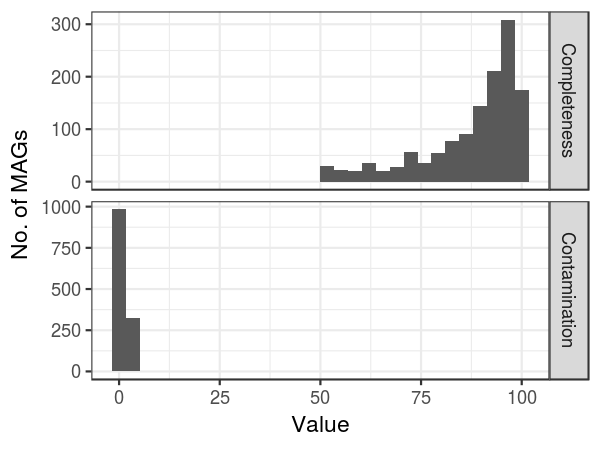

In [50]:
# checkm stats
drep_res_j$Completeness %>% summary %>% print
drep_res_j$Completeness %>% sd %>% print
drep_res_j$Contamination %>% summary %>% print
drep_res_j$Contamination %>% sd %>% print

p = drep_res_j %>%
    dplyr::select(binID, Completeness, Contamination) %>%
    gather(Metric, Value, -binID) %>%
    ggplot(aes(Value)) +
    geom_histogram(bins=30) +
    labs(y='No. of MAGs') +
    facet_grid(Metric ~ ., scales='free_y') +
    theme_bw() 

dims(4,3)
Plot(p)

In [35]:
cat('Number of "high quality" genomes:', 
    drep_res_j %>% filter(Completeness >= 90) %>% nrow, '\n')

Number of "high quality" genomes: 763 


## GTDBTk

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/.figures/65c6c4b86d19532eac5b8503c751c3d5.RDS 


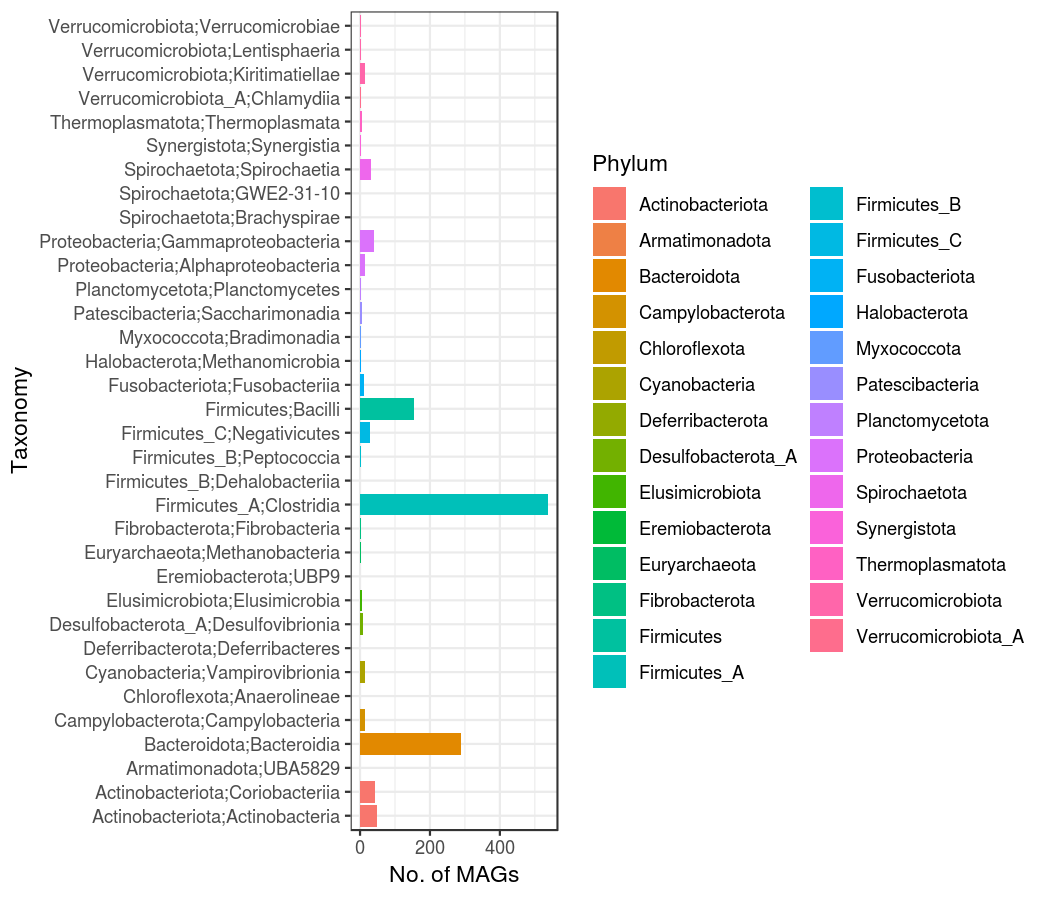

In [74]:
# Total by class
p = drep_res_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs') +
    theme_bw() 

dims(7,6)
Plot(p)

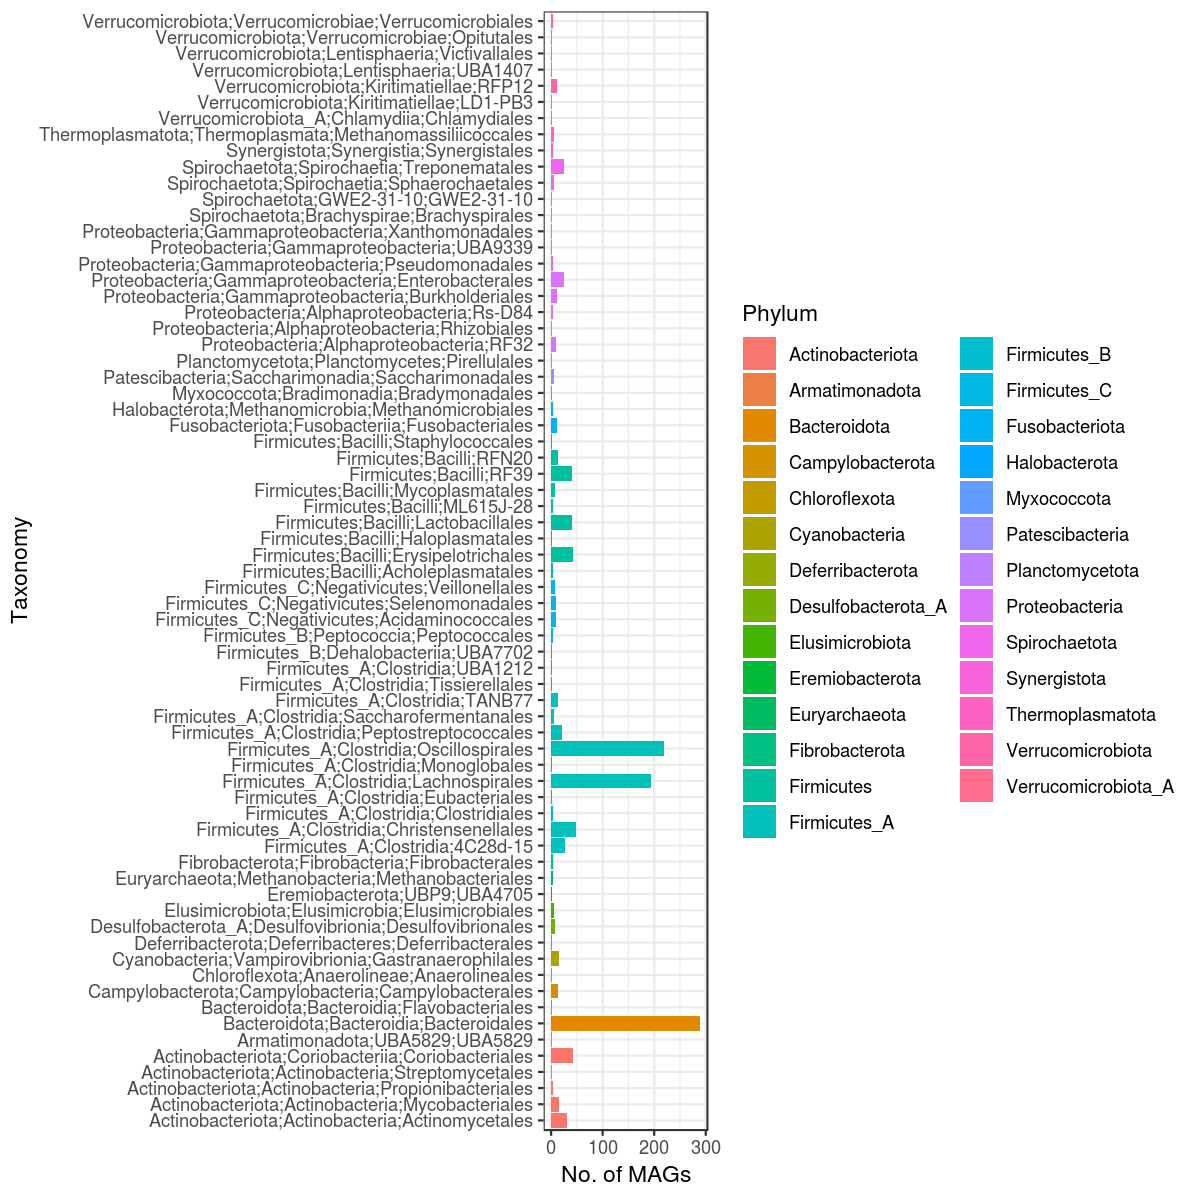

In [39]:
# Total by order
p = drep_res_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, Order, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs') +
    theme_bw() 

dims(8,8)
plot(p)

In [40]:
# Christ. genomes
drep_res_j %>%
    filter(Order == 'o__Christensenellales') %>%
    nrow %>% print
# Methanogen genomes
drep_res_j %>%
    filter(Domain == 'd__Archaea',
           grepl('^c__Methano', Class)) %>%
    nrow %>% print

[1] 49
[1] 8


Number of MAGs with closests match ANI of <95%: 1001 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/.figures/4f8a232df0181cc6322273d0465c89c9.RDS 


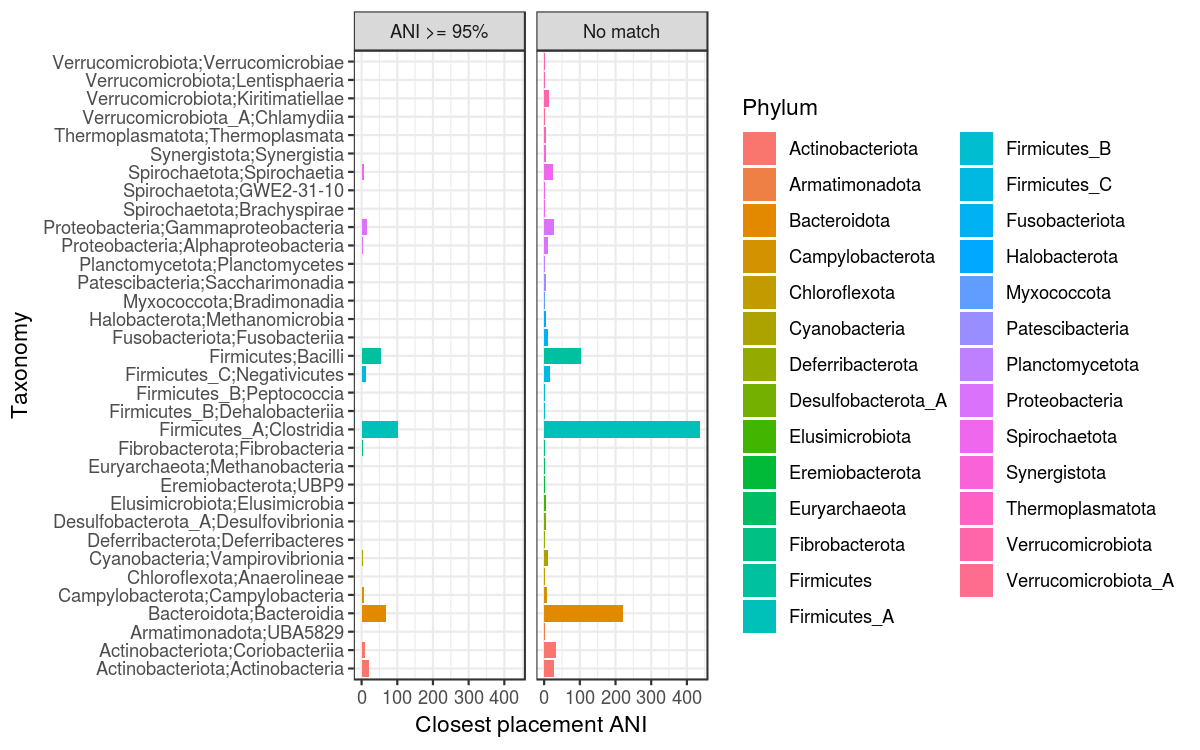

In [76]:
# no close ANI matches 
drep_res_j_s = drep_res_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    mutate(closest_placement_ani = closest_placement_ani %>% as.character,
           closest_placement_ani = ifelse(closest_placement_ani == 'N/A', 
                                          0, closest_placement_ani),
           closest_placement_ani = ifelse(is.na(closest_placement_ani), 
                                          0, closest_placement_ani),
           closest_placement_ani = closest_placement_ani %>% as.Num) %>%
    mutate(has_species_placement = ifelse(closest_placement_ani >= 95,
                                          'ANI >= 95%', 'No match')) 

cat('Number of MAGs with closests match ANI of <95%:',
    drep_res_j_s %>% filter(closest_placement_ani < 95) %>% nrow, '\n')

p = drep_res_j_s %>%
    ggplot(aes(Taxonomy, fill=Phylum)) +
    geom_bar() +
    facet_grid(. ~ has_species_placement) +
    coord_flip() +
    labs(y='Closest placement ANI') +
    theme_bw() 

dims(8,5)
Plot(p)

Number of genomes lacking a genus-level classification: 216 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/.figures/2563f84113d566fdd1fa2820f8ebba54.RDS 


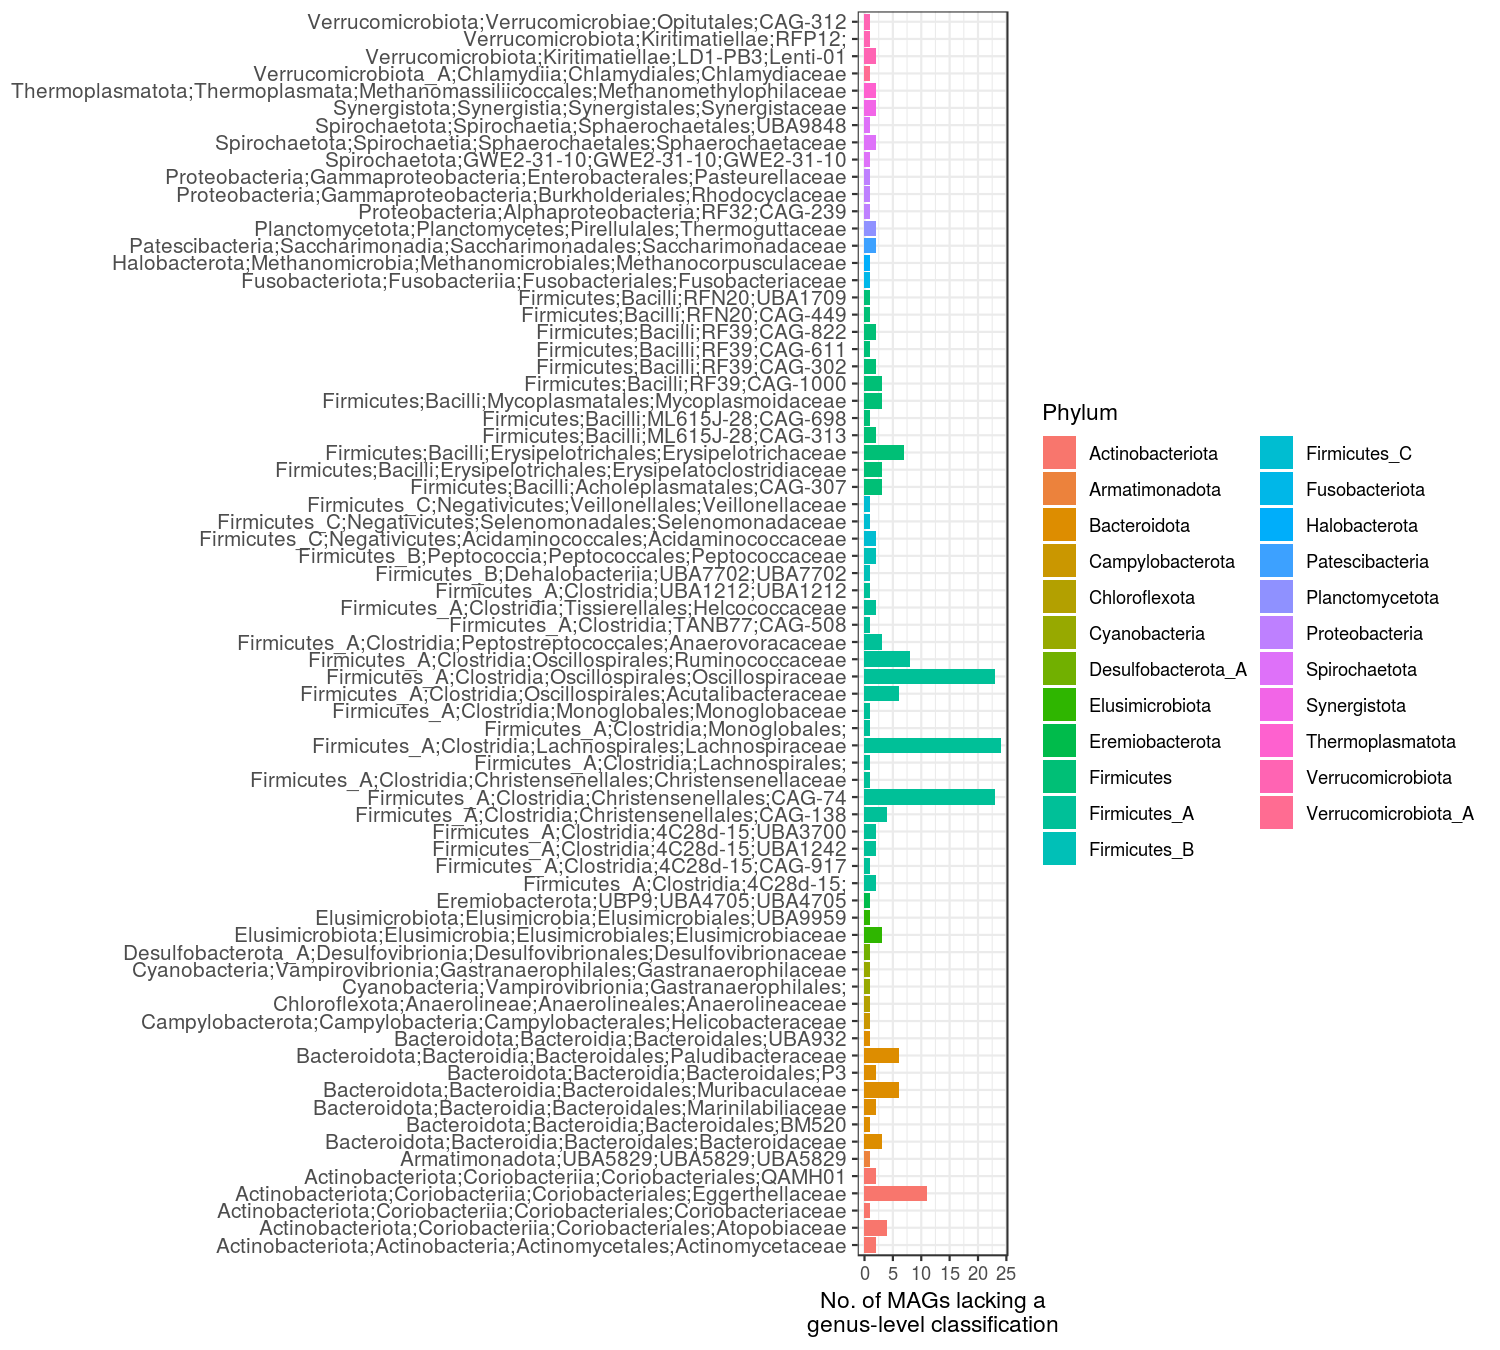

In [42]:
drep_j_s = drep_res_j %>%
    filter(Genus == 'g__') %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order),
           Family = gsub('^f__', '', Family)) %>%
    unite(Taxonomy, Phylum, Class, Order, Family, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup()

cat('Number of genomes lacking a genus-level classification:',
    drep_j_s$n %>% sum, '\n')

p = drep_j_s %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs lacking a\ngenus-level classification') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=10),
        axis.title.y = element_blank()
    )

dims(10,9)
Plot(p)

Number of genomes lacking a family-level classification: 6 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/.figures/ae6072f58760b5579b19e31604b416a2.RDS 


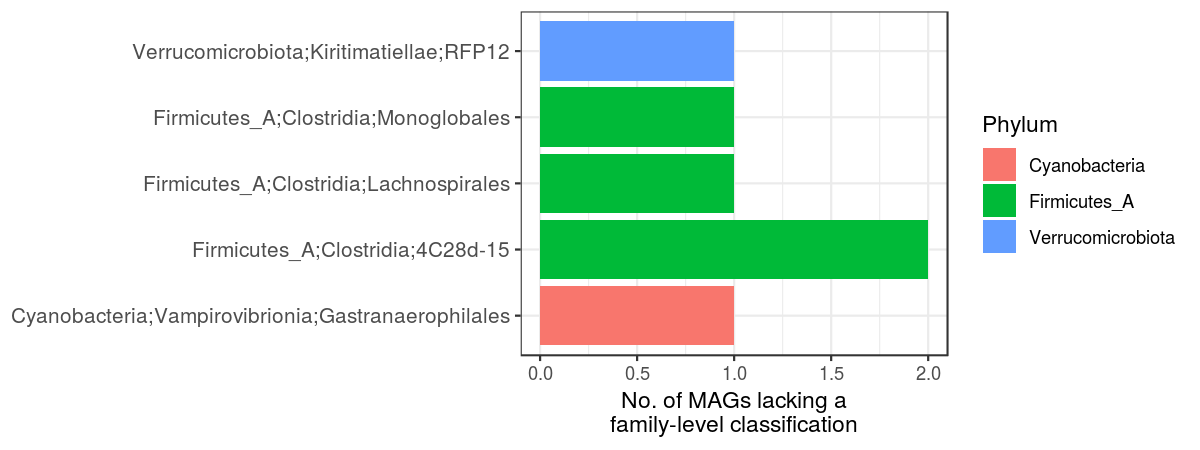

In [43]:
drep_j_s = drep_res_j %>%
    filter(Family == 'f__') %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, Order,  sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup()

cat('Number of genomes lacking a family-level classification:',
    drep_j_s$n %>% sum, '\n')

p = drep_j_s %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs lacking a\nfamily-level classification') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=10),
        axis.title.y = element_blank()
    )

dims(8,3)
Plot(p)

# Summary by project

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/.figures/76cbf819ae63cbab4988b49c97b99255.RDS 


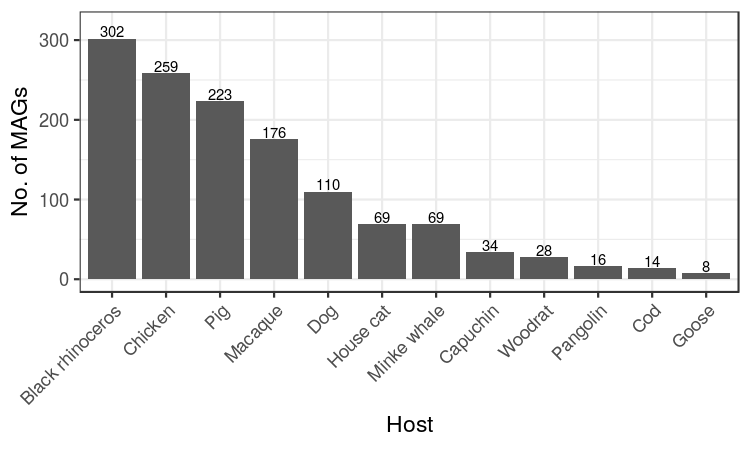

In [51]:
# Total by class
p = drep_res_j %>%
    group_by(Host, projectID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    mutate(Host = Host %>% reorder(-n),
           N = n %>% as.character) %>%
    ggplot(aes(Host, n, label=n)) +
    geom_bar(stat='identity') +
    geom_text(aes(y=n), size=2.5, vjust=-0.1) +
    scale_y_continuous(limits=c(0, 320)) +
    labs(y='No. of MAGs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(5,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/.figures/79b6a52ded3fc92c591ea3ed60a64886.RDS 


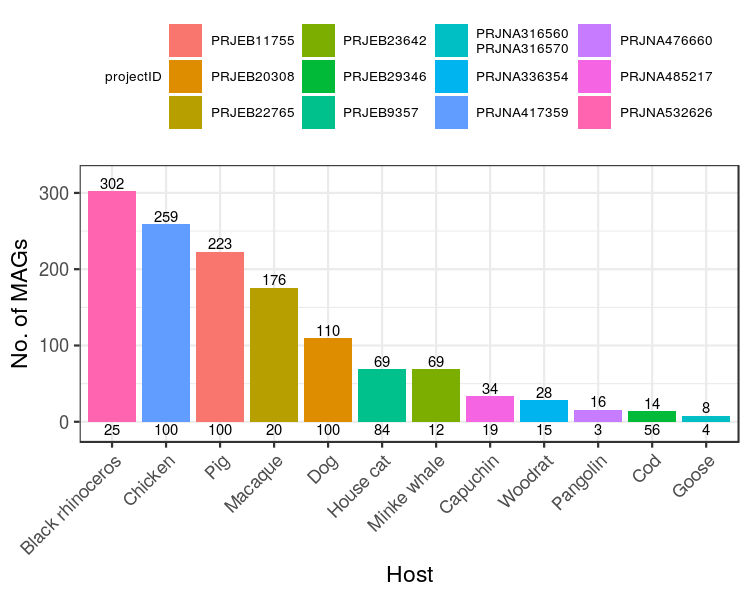

In [59]:
# Total by class
p = drep_res_j %>%
    group_by(Host, projectID) %>%
    summarize(n = n(),
              Num_samples_used = first(Num_samples_used)) %>%
    ungroup() %>%
    mutate(Host = Host %>% reorder(-n),
           N = n %>% as.character,
           projectID = gsub('-', '\n', projectID)) %>%
    ggplot(aes(Host, n, fill=projectID)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=n), size=2.5, vjust=-0.2) +
    geom_text(aes(y=-10, label=Num_samples_used), size=2.5, vjust=0.5) +
    scale_y_continuous(limits=c(-10, 320)) +
    labs(y='No. of MAGs') +
    theme_bw() +
    theme(
        legend.position = 'top',
        legend.title=element_text(size=6.5), 
        legend.text=element_text(size=6.5),
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(5,4)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/.figures/77a18cb67d87bc4d57398448a87c06a2.RDS 


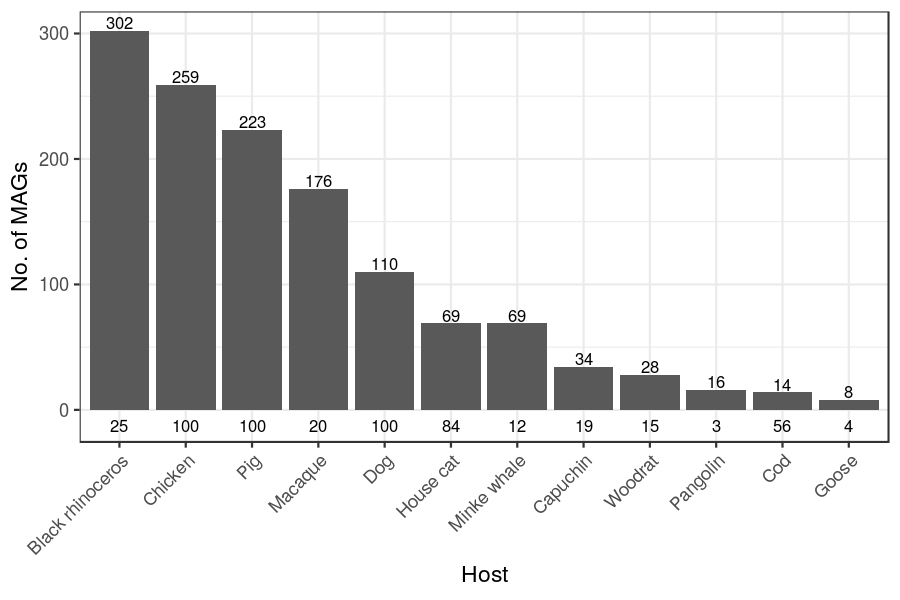

In [65]:
# Total by class
p = drep_res_j %>%
    group_by(Host, projectID) %>%
    summarize(n = n(),
              Num_samples_used = first(Num_samples_used)) %>%
    ungroup() %>%
    mutate(Host = Host %>% reorder(-n),
           N = n %>% as.character,
           projectID = gsub('-', '\n', projectID)) %>%
    ggplot(aes(Host, n)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=n), size=2.8, vjust=-0.15) +
    geom_text(aes(y=-10, label=Num_samples_used), size=2.8, vjust=0.8) +
    labs(y='No. of MAGs') +
    theme_bw() +
    theme(
        legend.position = 'top',
        legend.title=element_text(size=6.5), 
        legend.text=element_text(size=6.5),
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(6,4)
Plot(p)

## GTDBTk

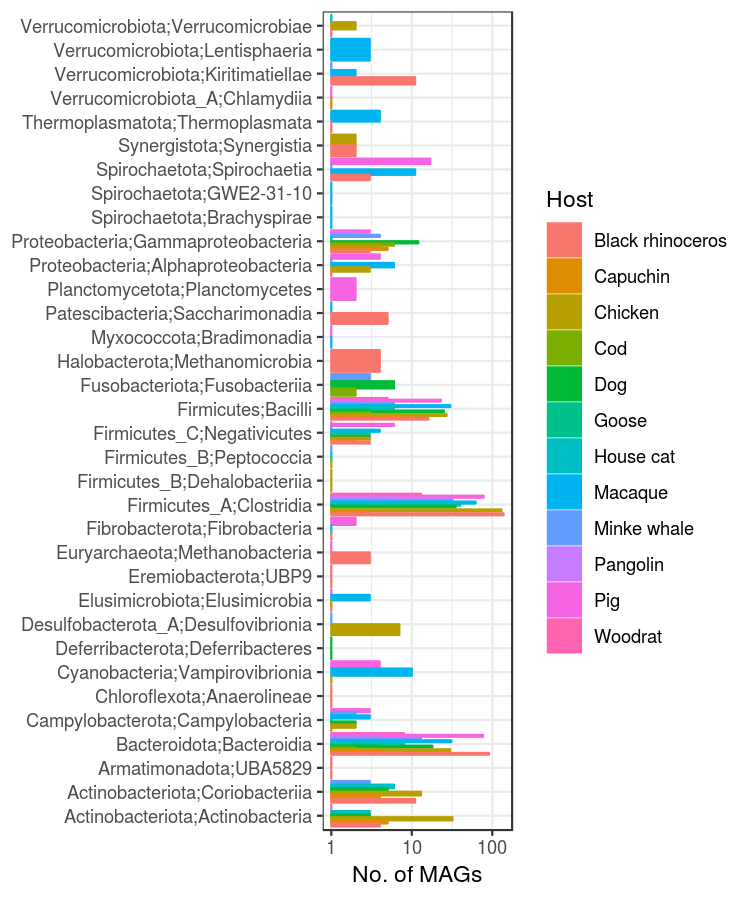

In [66]:
# Total by class
p = drep_res_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    group_by(Host, projectID, Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Host, color=Host)) +
    geom_bar(stat='identity', position='dodge') +
    #geom_point(alpha=0.5) +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of MAGs') +
    theme_bw() +
    theme(
        axis.title.y = element_blank()
    )

dims(5,6)
plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/.figures/3bcb9adb1c97fa35ac54b7edad76eb22.RDS 


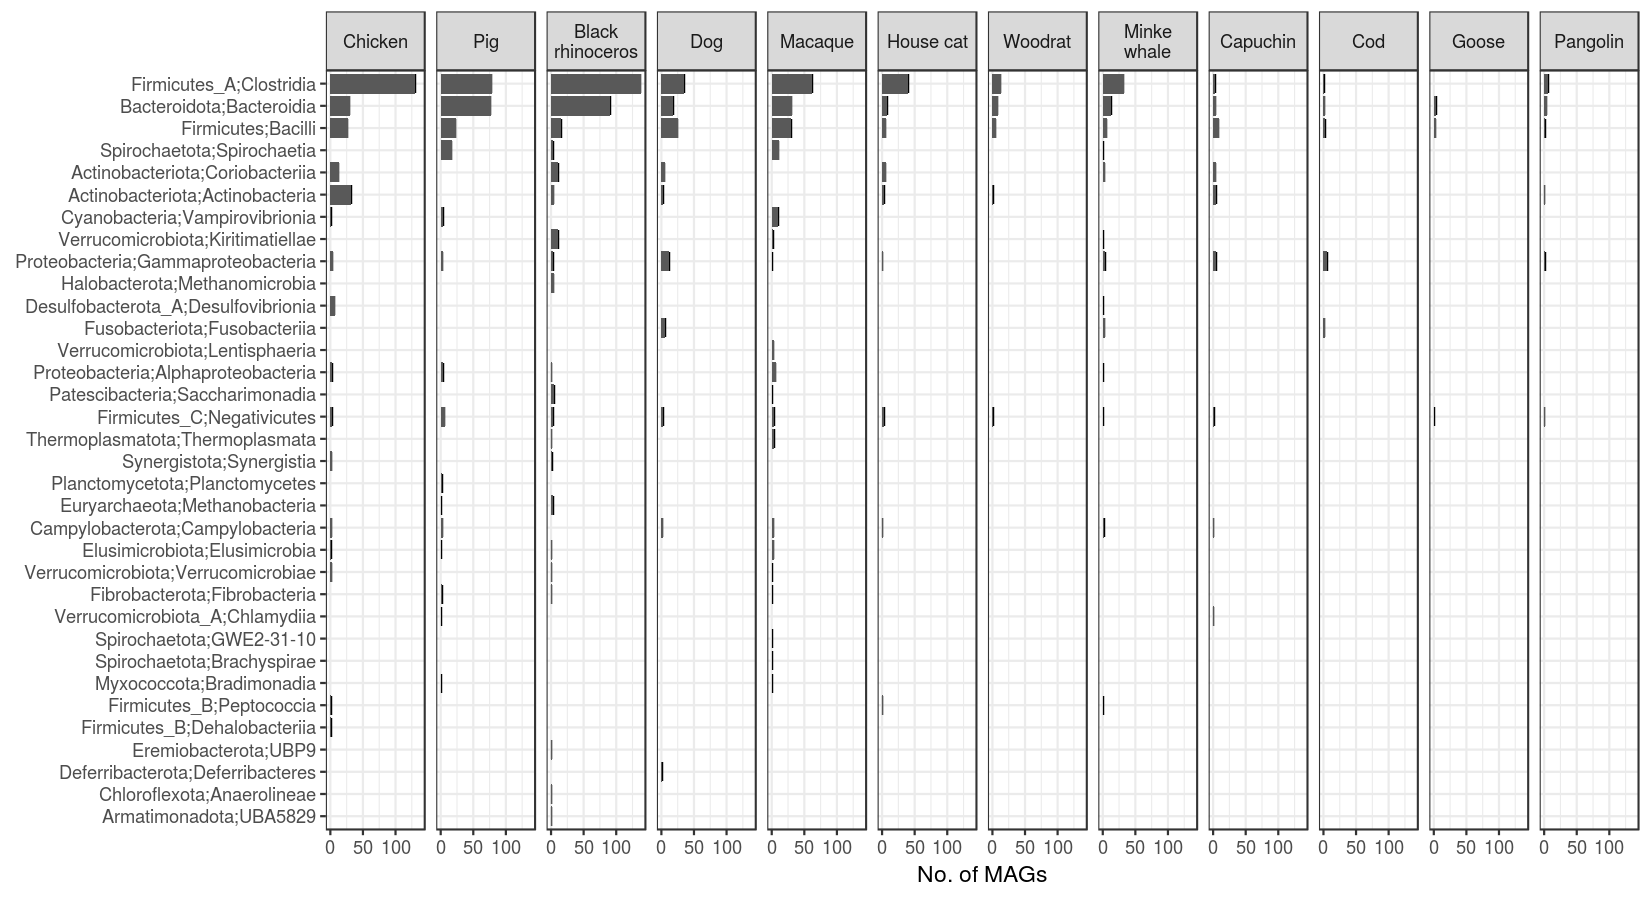

In [72]:
# Total by class
p = drep_res_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    group_by(Host, projectID, Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    mutate(Taxonomy = Taxonomy %>% reorder(n),
           Host = stringr::str_wrap(Host, 10),
           Host = Host %>% reorder(-n)) %>%
    ggplot(aes(Taxonomy, n)) +
    geom_point(shape='|', size=3) +
    geom_bar(stat='identity') +
    #scale_y_log10(breaks=c(0,1,10,100)) +
    coord_flip() +
    labs(y='No. of MAGs') +
    facet_grid(. ~ Host) +
    theme_bw() +
    theme(
        axis.title.y = element_blank()
    )

dims(11,6)
Plot(p)

# sessionInfo

In [70]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] bindrcpp_0.2.2          future.apply_1.0.0      future.batchtools_0.7.1
 [4] future_1.9.0            doParallel_1.0.11       iterators_1.0.10       
 [7] foreach_1.4.4           data.table_1.11.4       ggplot2_3.0.0          
[10] readxl_1.1.0            tidyr_0.8.1             dplyr_0.7.6            

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-2      progress_1.2.0    tidyselect_0.2.4  repr_0.15.0      
 [5] reshape2_1.4.3    purrr_0.2.4       listenv_0.7.0     colorspace_1.3-2 
 [9] htmltools_0.3